# ベルマンフォード法
SSP(Single Source Shortest Path) 単一始点対最短経路問題を解く方法の一つ。

### メリット
辺の重みが負の場合でも使える。

### デメリット
ダイクストラ法より遅い。(頂点数を V 、辺の数を E としたとき、計算量は O(|V||E|))  
また、以下のような重みの和が負である閉路があると、無限ループしてしまうので、適用できない。

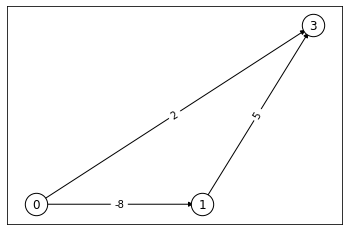

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionStyle
import networkx as nx

# Graphオブジェクトの作成
DG = nx.DiGraph()

DG.add_weighted_edges_from([(0, 1, -8),(0, 3, 2),(1, 3, 5)])


options = {
    "font_size": 10,
    "node_size": 400,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

# ソート前は適当に配置
pos = {0: (-3, 0), 1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}
edge_labels = {(i, j): w['weight'] for i, j, w in DG.edges(data=True)} #エッジラベルの描画時に'weight'の表示を無くすための工夫

nx.draw_networkx_nodes(DG, pos, node_size=500, node_color='white',edgecolors='black') #ノードを描画
nx.draw_networkx_edges(DG, pos, width=1) #エッジを描画
nx.draw_networkx_labels(DG, pos) #（ノードの）ラベルを描画
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels) #エッジのラベルを描画

plt.show()

上のグラフ(閉路)は、重みの和が $2+5+(-8) = -1$であり、負であるので、ベルマンフォード法の手続きでは、無限に更新されていくことになる。  
よって、ベルマンフォード法は重みの和が負である閉路に適用できない。

### C++での実装
```cpp
#define INF 10000000

struct Edge {
    int from; // 出発点
    int to;   // 行き先
    int cost; // コスト
};

vector<int> BellmanFord(int V, const vector<Edge> &edges, int start, int goal) {
    vector<int> dist(V, INF);
    dist[start] = 0;
    for (int i = 0; i < V; i++) {
        for (auto e : edges) {
            if (dist[e.from] + e.cost <= dist[e.to]) {
                dist[e.to] = dist[e.from] + e.cost;
                if (i == V - 1) { // 頂点の数と同じ回数ループすると、コストの和が負の閉路があるのでループをぬける
                    cout << "negative loop" << endl;
                    break;
                }
            }
        }
    }
    return dist;
}
int main() {
    int N, M, a, b, c;
    cin >> N >> M;
    vector<Edge> edges;
    rep(i, 0, M) {
        cin >> a >> b >> c;
        edges.push_back({a - 1, b - 1, c}); // {b, c} として Edge Struct を省略して宣言している
        edges.push_back({b - 1, a - 1, c}); // {b, c} として Edge Struct を省略して宣言している
    }
    // 初期化
    vector<int> dist = BellmanFord(/*グラフの頂点数*/ N, /*辺*/ edges, /*始点*/ 0, /*終点*/ N - 1);
    // rep(i, 1, N + 1) cout << (dist[i] == INF ? -1 : dist[i]) << endl;
    for (int d : dist) {
        cout << (d == INF ? -1 : d) << endl;
    }
    return 0;
}
```